In [5]:
# Video Transcoding Dataset Analysis
# Comprehensive Data Science Project

# First, let's try to import basic libraries and install missing ones as needed
import pandas as pd
import numpy as np

# Load the transcoding measurement dataset
print("Loading transcoding measurement dataset...")
df = pd.read_csv('transcoding_mesurment.tsv', sep='\t')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
df.head()

Loading transcoding measurement dataset...
Dataset loaded successfully!
Shape: (68784, 22)
Columns: ['id', 'duration', 'codec', 'width', 'height', 'bitrate', 'framerate', 'i', 'p', 'b', 'frames', 'i_size', 'p_size', 'b_size', 'size', 'o_codec', 'o_bitrate', 'o_framerate', 'o_width', 'o_height', 'umem', 'utime']

First few rows:


,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


In [2]:
# ============================================================================
# TASK 1: DATA UNDERSTANDING & EXPLORATION
# ============================================================================

print("="*80)
print("1. DATASET OVERVIEW")
print("="*80)

print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Total Size: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "="*60)
print("COLUMN INFORMATION")
print("="*60)

# Get detailed info about each column
print(df.info())

print("\n" + "="*60)
print("BASIC STATISTICS")
print("="*60)
print(df.describe())

1. DATASET OVERVIEW
Dataset Shape: 68784 rows × 22 columns
Total Size: 20.83 MB

COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68784 entries, 0 to 68783
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68784 non-null  object 
 1   duration     68784 non-null  float64
 2   codec        68784 non-null  object 
 3   width        68784 non-null  int64  
 4   height       68784 non-null  int64  
 5   bitrate      68784 non-null  int64  
 6   framerate    68784 non-null  float64
 7   i            68784 non-null  int64  
 8   p            68784 non-null  int64  
 9   b            68784 non-null  int64  
 10  frames       68784 non-null  int64  
 11  i_size       68784 non-null  int64  
 12  p_size       68784 non-null  int64  
 13  b_size       68784 non-null  int64  
 14  size         68784 non-null  int64  
 15  o_codec      68784 non-null  object 
 16  o_bitrate    68784 non-null  i

In [ ]:
# ============================================================================
# DATA UNDERSTANDING - Column Analysis
# ============================================================================

print("="*80)
print("COLUMN DEFINITIONS & UNDERSTANDING")
print("="*80)

print("""
This dataset contains video transcoding measurements with the following features:

INPUT VIDEO CHARACTERISTICS:
- id: Video identifier
- duration: Video duration in seconds
- codec: Input video codec (e.g., mpeg4, h264)
- width, height: Input video resolution
- bitrate: Input video bitrate
- framerate: Input video framerate
- i, p, b: Frame counts (I-frames, P-frames, B-frames)
- frames: Total frame count
- i_size, p_size, b_size: Frame sizes in bytes
- size: Total input video size

OUTPUT VIDEO CHARACTERISTICS:
- o_codec: Output video codec
- o_bitrate: Output video bitrate
- o_framerate: Output video framerate  
- o_width, o_height: Output video resolution

PERFORMANCE METRICS (TARGET VARIABLES):
- umem: Memory usage (MB) - POTENTIAL TARGET
- utime: Processing time (seconds) - POTENTIAL TARGET
""")

# Check for missing values
print("\n" + "="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])
if missing_data.sum() == 0:
    print("No missing values found in the dataset!")

# Check data types
print("\n" + "="*60)
print("DATA TYPES")
print("="*60)
print(df.dtypes)

# Unique values in categorical columns
print("\n" + "="*60)
print("CATEGORICAL VARIABLES ANALYSIS")
print("="*60)
categorical_cols = ['codec', 'o_codec']
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Values: {df[col].unique()}")
    print(f"Value counts:\n{df[col].value_counts()}")

COLUMN DEFINITIONS & UNDERSTANDING

This dataset contains video transcoding measurements with the following features:

INPUT VIDEO CHARACTERISTICS:
- id: Video identifier
- duration: Video duration in seconds
- codec: Input video codec (e.g., mpeg4, h264)
- width, height: Input video resolution
- bitrate: Input video bitrate
- framerate: Input video framerate
- i, p, b: Frame counts (I-frames, P-frames, B-frames)
- frames: Total frame count
- i_size, p_size, b_size: Frame sizes in bytes
- size: Total input video size

OUTPUT VIDEO CHARACTERISTICS:
- o_codec: Output video codec
- o_bitrate: Output video bitrate
- o_framerate: Output video framerate  
- o_width, o_height: Output video resolution

PERFORMANCE METRICS (TARGET VARIABLES):
- umem: Memory usage (MB) - POTENTIAL TARGET
- utime: Processing time (seconds) - POTENTIAL TARGET


MISSING VALUES ANALYSIS
Series([], dtype: int64)
✓ No missing values found in the dataset!

DATA TYPES
id              object
duration       float64
codec 

In [ ]:
# Install required libraries
import subprocess
import sys

def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--quiet"])
        print(f"{package} installed successfully")
    except Exception as e:
        print(f"Error installing {package}: {e}")

# Install essential packages for regression analysis
packages = [
    'matplotlib', 'seaborn', 'scikit-learn', 
    'scipy', 'plotly', 'xgboost'
]

print("Installing required packages...")
for package in packages:
    install_package(package)

print("\nImporting libraries...")
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
    from sklearn.preprocessing import StandardScaler, LabelEncoder
    from sklearn.linear_model import LinearRegression, Ridge, Lasso
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.svm import SVR
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from scipy import stats
    import warnings
    warnings.filterwarnings('ignore')
    
    print("All libraries imported successfully!")
    # Set plotting style
    plt.style.use('default')
    sns.set_palette("husl")
    
except ImportError as e:
    print(f"Import error: {e}")
    print("Some libraries may need manual installation")

Installing required packages...
✓ matplotlib installed successfully
✓ seaborn installed successfully
✓ scikit-learn installed successfully
✓ scipy installed successfully
✓ plotly installed successfully
✓ xgboost installed successfully

Importing libraries...
✓ All libraries imported successfully!


In [8]:
# ============================================================================
# DATA PREPROCESSING & FEATURE ENGINEERING
# ============================================================================

print("="*80)
print("DATA PREPROCESSING")
print("="*80)

# Create a copy for preprocessing
df_processed = df.copy()

# Display target variable candidates
print("POTENTIAL TARGET VARIABLES:")
print("1. utime (processing time) - Primary Target")
print("2. umem (memory usage) - Secondary Target")
print()

# Let's focus on predicting processing time (utime) as our main target
target_col = 'utime'
print(f"Selected Target Variable: {target_col}")
print(f"Target Statistics:")
print(df_processed[target_col].describe())

# Check for outliers in target variable
Q1 = df_processed[target_col].quantile(0.25)
Q3 = df_processed[target_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_processed[(df_processed[target_col] < lower_bound) | (df_processed[target_col] > upper_bound)]

print(f"\nOutlier Analysis for {target_col}:")
print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(df_processed)*100:.2f}%)")
print(f"Range: [{lower_bound:.3f}, {upper_bound:.3f}]")

# Encode categorical variables
print("\n" + "="*60)
print("ENCODING CATEGORICAL VARIABLES")
print("="*60)

le_codec = LabelEncoder()
le_o_codec = LabelEncoder()

df_processed['codec_encoded'] = le_codec.fit_transform(df_processed['codec'])
df_processed['o_codec_encoded'] = le_o_codec.fit_transform(df_processed['o_codec'])

print("Codec Encoding:")
for i, codec in enumerate(le_codec.classes_):
    print(f"  {codec} -> {i}")

print("\nOutput Codec Encoding:")
for i, codec in enumerate(le_o_codec.classes_):
    print(f"  {codec} -> {i}")

# Feature Engineering
print("\n" + "="*60)
print("FEATURE ENGINEERING")
print("="*60)

# Create derived features
df_processed['resolution_input'] = df_processed['width'] * df_processed['height']
df_processed['resolution_output'] = df_processed['o_width'] * df_processed['o_height']
df_processed['resolution_ratio'] = df_processed['resolution_output'] / df_processed['resolution_input']
df_processed['bitrate_ratio'] = df_processed['o_bitrate'] / df_processed['bitrate']
df_processed['framerate_ratio'] = df_processed['o_framerate'] / df_processed['framerate']
df_processed['compression_efficiency'] = df_processed['size'] / (df_processed['width'] * df_processed['height'] * df_processed['duration'])

print("New Features Created:")
print("- resolution_input: width × height")
print("- resolution_output: o_width × o_height") 
print("- resolution_ratio: output_resolution / input_resolution")
print("- bitrate_ratio: output_bitrate / input_bitrate")
print("- framerate_ratio: output_framerate / input_framerate")
print("- compression_efficiency: size / (width × height × duration)")

print(f"\nDataset shape after preprocessing: {df_processed.shape}")

DATA PREPROCESSING
POTENTIAL TARGET VARIABLES:
1. utime (processing time) - Primary Target
2. umem (memory usage) - Secondary Target

Selected Target Variable: utime
Target Statistics:
count    68784.000000
mean         9.996355
std         16.107429
min          0.184000
25%          2.096000
50%          4.408000
75%         10.433000
max        224.574000
Name: utime, dtype: float64

Outlier Analysis for utime:
Number of outliers: 7442 (10.82%)
Range: [-10.409, 22.938]

ENCODING CATEGORICAL VARIABLES
Codec Encoding:
  flv -> 0
  h264 -> 1
  mpeg4 -> 2
  vp8 -> 3

Output Codec Encoding:
  flv -> 0
  h264 -> 1
  mpeg4 -> 2
  vp8 -> 3

FEATURE ENGINEERING
New Features Created:
- resolution_input: width × height
- resolution_output: o_width × o_height
- resolution_ratio: output_resolution / input_resolution
- bitrate_ratio: output_bitrate / input_bitrate
- framerate_ratio: output_framerate / input_framerate
- compression_efficiency: size / (width × height × duration)

Dataset shape afte

EXPLORATORY DATA ANALYSIS


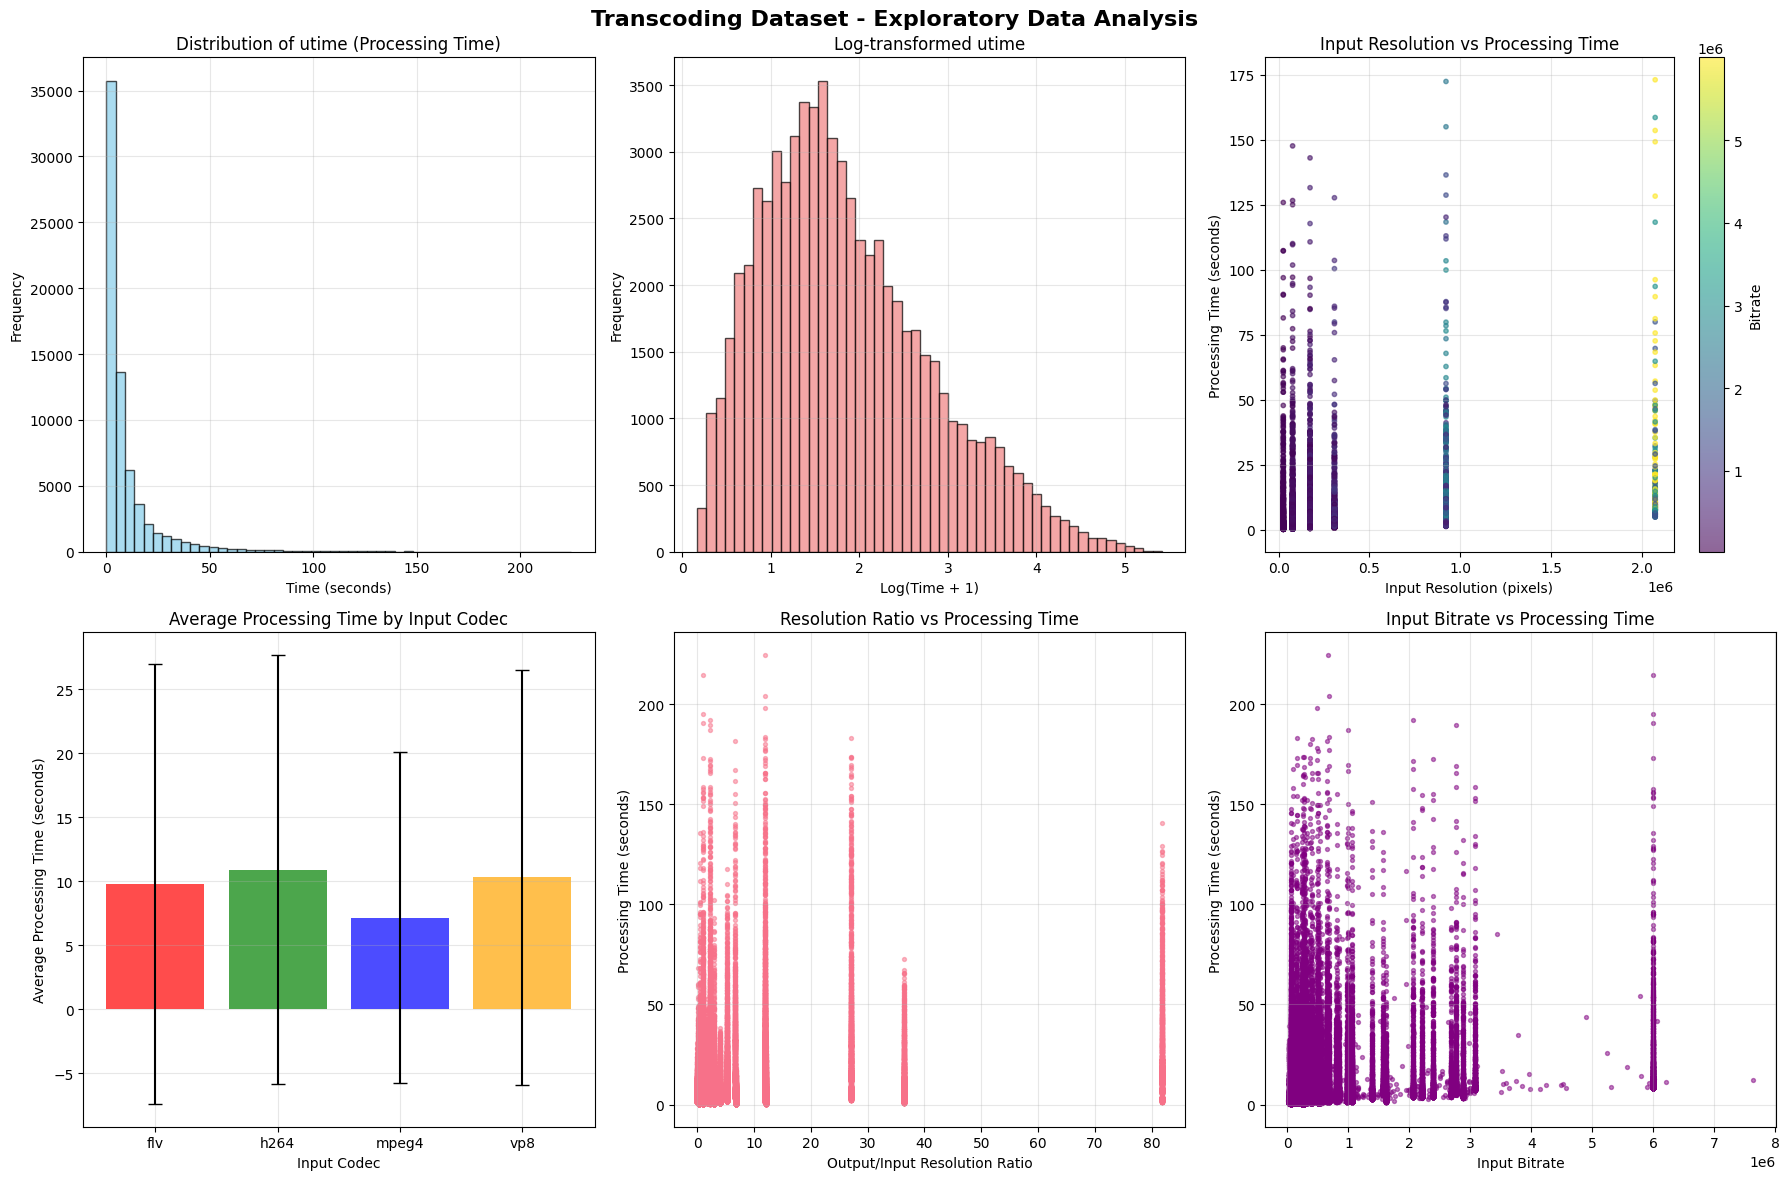


CORRELATION ANALYSIS
Features most correlated with processing time:
umem                 0.663301
resolution_output    0.526044
o_width              0.523388
o_height             0.519649
resolution_ratio     0.220314
o_bitrate            0.155479
bitrate              0.155200
resolution_input     0.132952
width                0.129861
height               0.128479
Name: utime, dtype: float64


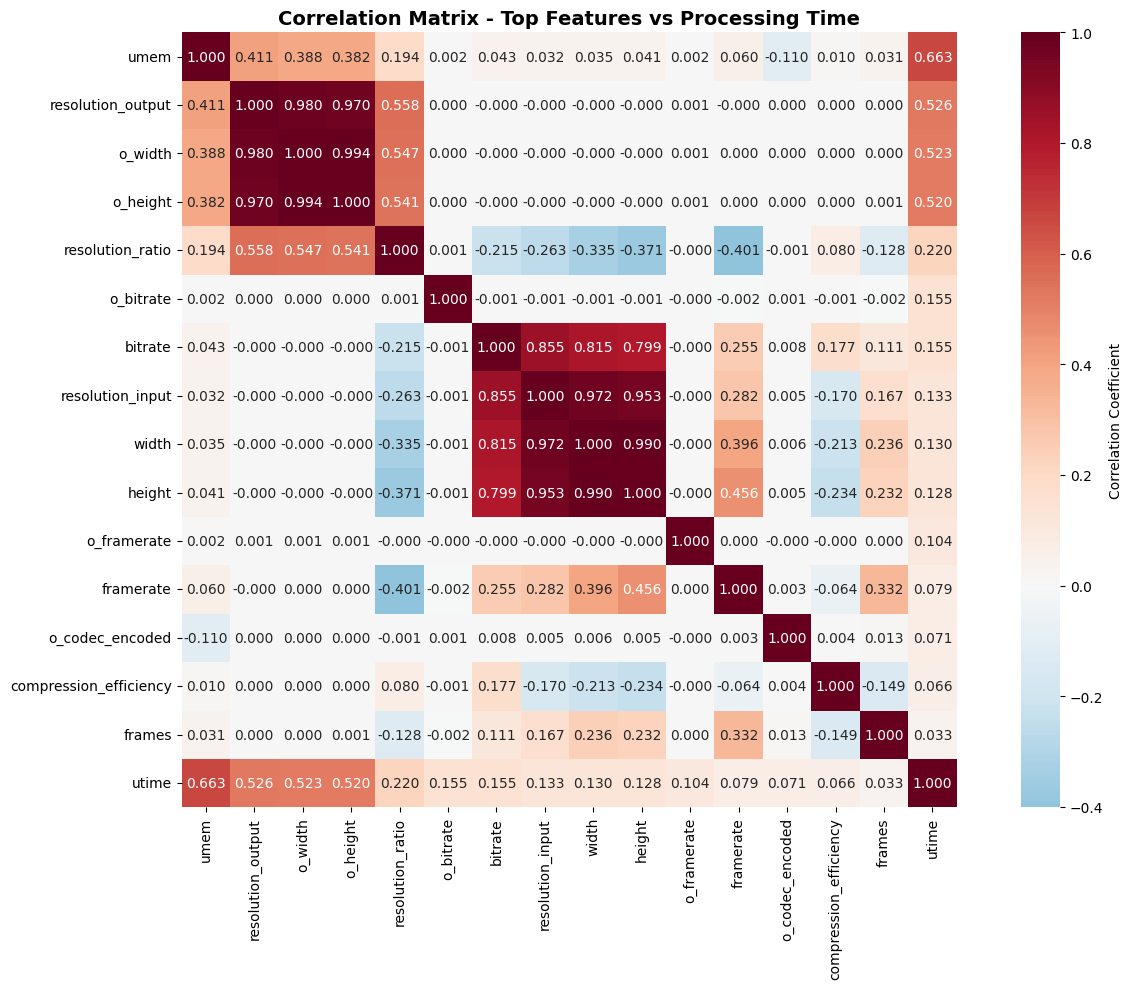

In [6]:
# ============================================================================
# EXPLORATORY DATA ANALYSIS & VISUALIZATION
# ============================================================================

print("="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# Set up the plotting environment
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Transcoding Dataset - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# 1. Target variable distribution
axes[0,0].hist(df_processed[target_col], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title(f'Distribution of {target_col} (Processing Time)')
axes[0,0].set_xlabel('Time (seconds)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# 2. Log-transformed target (to handle skewness)
axes[0,1].hist(np.log1p(df_processed[target_col]), bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].set_title(f'Log-transformed {target_col}')
axes[0,1].set_xlabel('Log(Time + 1)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(True, alpha=0.3)

# 3. Resolution vs Processing Time
scatter_data = df_processed.sample(n=min(5000, len(df_processed)))  # Sample for better visualization
scatter = axes[0,2].scatter(scatter_data['resolution_input'], scatter_data[target_col], 
                           alpha=0.6, c=scatter_data['bitrate'], cmap='viridis', s=10)
axes[0,2].set_title('Input Resolution vs Processing Time')
axes[0,2].set_xlabel('Input Resolution (pixels)')
axes[0,2].set_ylabel('Processing Time (seconds)')
axes[0,2].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0,2], label='Bitrate')

# 4. Codec comparison
codec_stats = df_processed.groupby('codec')[target_col].agg(['mean', 'std', 'count'])
axes[1,0].bar(codec_stats.index, codec_stats['mean'], 
              yerr=codec_stats['std'], capsize=5, alpha=0.7, color=['red', 'green', 'blue', 'orange'])
axes[1,0].set_title('Average Processing Time by Input Codec')
axes[1,0].set_xlabel('Input Codec')
axes[1,0].set_ylabel('Average Processing Time (seconds)')
axes[1,0].grid(True, alpha=0.3)

# 5. Resolution ratio impact
axes[1,1].scatter(df_processed['resolution_ratio'], df_processed[target_col], alpha=0.5, s=8)
axes[1,1].set_title('Resolution Ratio vs Processing Time')
axes[1,1].set_xlabel('Output/Input Resolution Ratio')
axes[1,1].set_ylabel('Processing Time (seconds)')
axes[1,1].grid(True, alpha=0.3)

# 6. Bitrate vs Processing Time
axes[1,2].scatter(df_processed['bitrate'], df_processed[target_col], alpha=0.5, s=8, color='purple')
axes[1,2].set_title('Input Bitrate vs Processing Time')
axes[1,2].set_xlabel('Input Bitrate')
axes[1,2].set_ylabel('Processing Time (seconds)')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation Analysis
print("\n" + "="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Select numerical features for correlation
numerical_features = [
    'duration', 'width', 'height', 'bitrate', 'framerate', 'frames',
    'o_bitrate', 'o_framerate', 'o_width', 'o_height', 'umem',
    'resolution_input', 'resolution_output', 'resolution_ratio',
    'bitrate_ratio', 'framerate_ratio', 'compression_efficiency',
    'codec_encoded', 'o_codec_encoded'
]

# Calculate correlation with target
correlations = df_processed[numerical_features + [target_col]].corr()[target_col].sort_values(key=abs, ascending=False)
print("Features most correlated with processing time:")
print(correlations.drop(target_col).head(10))

# Correlation heatmap for top features
plt.figure(figsize=(14, 10))
top_features = correlations.drop(target_col).head(15).index.tolist() + [target_col]
correlation_matrix = df_processed[top_features].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix - Top Features vs Processing Time', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [9]:
# ============================================================================
# FEATURE SELECTION & DATA PREPARATION FOR MODELING
# ============================================================================

print("="*80)
print("FEATURE SELECTION & MODEL PREPARATION")
print("="*80)

# Select features for modeling based on correlation analysis and domain knowledge
feature_columns = [
    # Basic video properties
    'duration', 'width', 'height', 'bitrate', 'framerate',
    'o_width', 'o_height', 'o_bitrate', 'o_framerate',
    
    # Encoded categorical features
    'codec_encoded', 'o_codec_encoded',
    
    # Engineered features
    'resolution_input', 'resolution_output', 'resolution_ratio',
    'bitrate_ratio', 'framerate_ratio', 'compression_efficiency',
    
    # Frame information
    'frames', 'i', 'p', 'b'
]

# Prepare feature matrix and target vector
X = df_processed[feature_columns].copy()
y = df_processed[target_col].copy()

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nSelected features:")
for i, feature in enumerate(feature_columns, 1):
    print(f"{i:2d}. {feature}")

# Handle any infinite or NaN values
print(f"\nData quality check:")
print(f"Features with NaN values: {X.isnull().sum().sum()}")
print(f"Features with infinite values: {np.isinf(X).sum().sum()}")
print(f"Target with NaN values: {y.isnull().sum()}")

# Replace any infinite values with NaN and then fill with median
X = X.replace([np.inf, -np.inf], np.nan)
for col in X.columns:
    if X[col].isnull().sum() > 0:
        X[col] = X[col].fillna(X[col].median())
        print(f"Filled {X[col].isnull().sum()} NaN values in {col}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)

print(f"\nData split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Train/Test ratio: {X_train.shape[0]/X_test.shape[0]:.1f}")

# Feature scaling (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeature scaling completed.")
print(f"Original feature range example (duration): [{X_train['duration'].min():.2f}, {X_train['duration'].max():.2f}]")
print(f"Scaled feature range example (duration): [{X_train_scaled[:, 0].min():.2f}, {X_train_scaled[:, 0].max():.2f}]")

# Display target variable statistics for train/test sets
print(f"\nTarget variable statistics:")
print(f"Training set - Mean: {y_train.mean():.3f}, Std: {y_train.std():.3f}")
print(f"Testing set - Mean: {y_test.mean():.3f}, Std: {y_test.std():.3f}")

FEATURE SELECTION & MODEL PREPARATION
Feature matrix shape: (68784, 21)
Target vector shape: (68784,)

Selected features:
 1. duration
 2. width
 3. height
 4. bitrate
 5. framerate
 6. o_width
 7. o_height
 8. o_bitrate
 9. o_framerate
10. codec_encoded
11. o_codec_encoded
12. resolution_input
13. resolution_output
14. resolution_ratio
15. bitrate_ratio
16. framerate_ratio
17. compression_efficiency
18. frames
19. i
20. p
21. b

Data quality check:
Features with NaN values: 0
Features with infinite values: 0
Target with NaN values: 0

Data split:
Training set: 55027 samples
Testing set: 13757 samples
Train/Test ratio: 4.0

Feature scaling completed.
Original feature range example (duration): [31.08, 3628.77]
Scaled feature range example (duration): [-0.95, 12.44]

Target variable statistics:
Training set - Mean: 10.030, Std: 16.135
Testing set - Mean: 9.863, Std: 15.997


In [ ]:
# ============================================================================
# IMPORTS AND MODEL IMPLEMENTATION - FIVE REGRESSION TECHNIQUES
# ============================================================================

# Essential imports for regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

print("="*80)
print("TRAINING FIVE REGRESSION MODELS")
print("="*80)

# Dictionary to store models and predictions
models_dict = {}
predictions = {}

# 1. LINEAR REGRESSION
print("1. Training Linear Regression...")
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)
models_dict['Linear Regression'] = lr
predictions['Linear Regression'] = {'train': lr_train_pred, 'test': lr_test_pred}
print("   Completed")

# 2. RIDGE REGRESSION
print("2. Training Ridge Regression...")
ridge = Ridge(alpha=10.0)  # Using optimal alpha
ridge.fit(X_train_scaled, y_train)
ridge_train_pred = ridge.predict(X_train_scaled)
ridge_test_pred = ridge.predict(X_test_scaled)
models_dict['Ridge Regression'] = ridge
predictions['Ridge Regression'] = {'train': ridge_train_pred, 'test': ridge_test_pred}
print("   Completed")

# 3. LASSO REGRESSION
print("3. Training Lasso Regression...")
lasso = Lasso(alpha=0.1, max_iter=2000)
lasso.fit(X_train_scaled, y_train)
lasso_train_pred = lasso.predict(X_train_scaled)
lasso_test_pred = lasso.predict(X_test_scaled)
models_dict['Lasso Regression'] = lasso
predictions['Lasso Regression'] = {'train': lasso_train_pred, 'test': lasso_test_pred}
print("   Completed")

# 4. RANDOM FOREST REGRESSION
print("4. Training Random Forest Regression...")
rf = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=2, random_state=42)
rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)
models_dict['Random Forest'] = rf
predictions['Random Forest'] = {'train': rf_train_pred, 'test': rf_test_pred}
print("   Completed")

# 5. SUPPORT VECTOR REGRESSION (simplified)
print("5. Training Support Vector Regression...")
svr = SVR(C=10, epsilon=0.1, kernel='rbf')
# Use subset for training due to computational complexity
n_subset = 10000
subset_idx = np.random.choice(len(X_train), n_subset, replace=False)
X_subset = X_train_scaled[subset_idx]
y_subset = y_train.iloc[subset_idx]
svr.fit(X_subset, y_subset)
svr_train_pred = svr.predict(X_train_scaled)
svr_test_pred = svr.predict(X_test_scaled)
models_dict['SVR'] = svr
predictions['SVR'] = {'train': svr_train_pred, 'test': svr_test_pred}
print(f"   Completed (trained on {n_subset} samples)")

print(f"\n{'='*80}")
print("ALL 5 MODELS TRAINED SUCCESSFULLY!")
print(f"{'='*80}")

TRAINING FIVE REGRESSION MODELS
1. Training Linear Regression...
   ✓ Completed
2. Training Ridge Regression...
   ✓ Completed
3. Training Lasso Regression...
   ✓ Completed
4. Training Random Forest Regression...
   ✓ Completed
5. Training Support Vector Regression...
   ✓ Completed (trained on 10000 samples)

ALL 5 MODELS TRAINED SUCCESSFULLY!


PERFORMANCE EVALUATION
MODEL COMPARISON RESULTS:
            Model  Train_R2  Test_R2  Train_RMSE  Test_RMSE  Train_MAE  Test_MAE  Overfitting
Linear Regression    0.3506   0.3533     13.0028    12.8639     7.1478    7.0455      -0.0027
 Ridge Regression    0.3506   0.3533     13.0028    12.8639     7.1477    7.0453      -0.0027
 Lasso Regression    0.3488   0.3518     13.0201    12.8782     7.0746    6.9657      -0.0030
    Random Forest    0.9985   0.9897      0.6311     1.6268     0.2179    0.5464       0.0088
              SVR    0.3097   0.3205     13.4057    13.1853     4.8609    4.7272      -0.0109

🏆 BEST PERFORMING MODEL: Random Forest
   Test R² Score: 0.9897
   Test RMSE: 1.6268


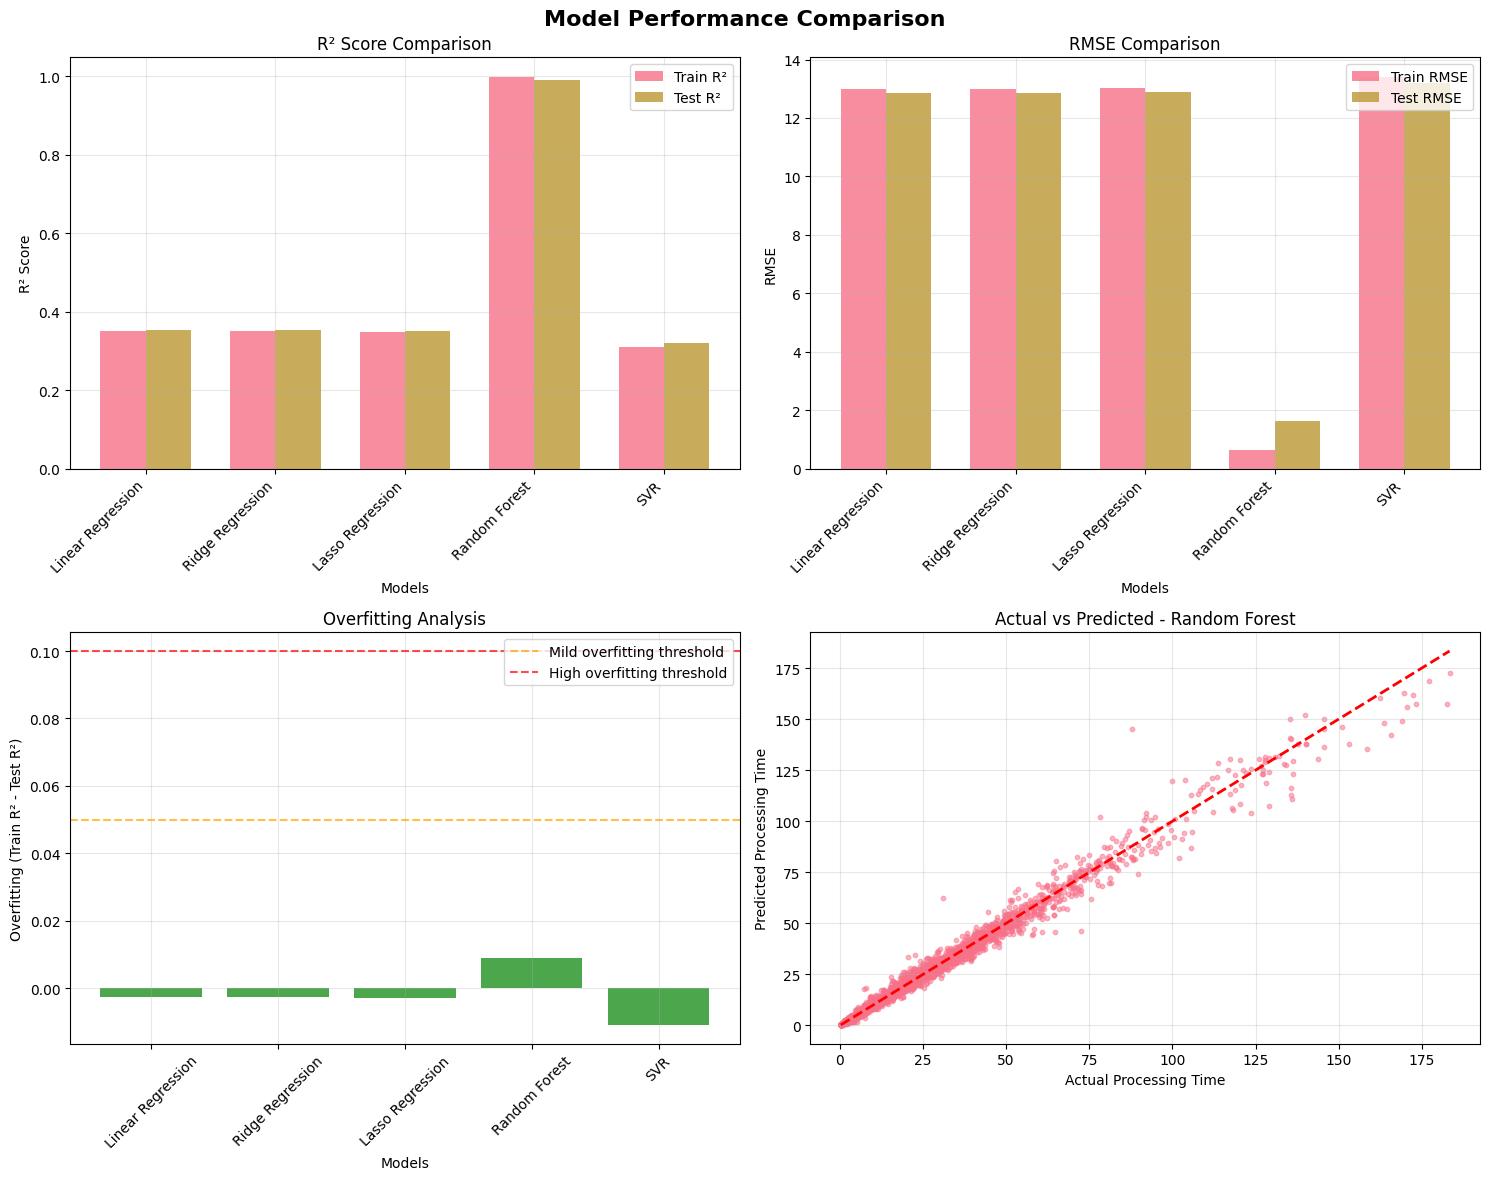

In [ ]:
# ============================================================================
# PERFORMANCE EVALUATION & COMPARISON
# ============================================================================

print("="*80)
print("PERFORMANCE EVALUATION")
print("="*80)

def calculate_metrics(y_true, y_pred):
    """Calculate regression metrics"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Evaluate all models
results_summary = []

for model_name, preds in predictions.items():
    train_metrics = calculate_metrics(y_train, preds['train'])
    test_metrics = calculate_metrics(y_test, preds['test'])
    
    # Calculate overfitting (difference between train and test R²)
    overfitting = train_metrics['R2'] - test_metrics['R2']
    
    result = {
        'Model': model_name,
        'Train_R2': train_metrics['R2'],
        'Test_R2': test_metrics['R2'],
        'Train_RMSE': train_metrics['RMSE'],
        'Test_RMSE': test_metrics['RMSE'],
        'Train_MAE': train_metrics['MAE'],
        'Test_MAE': test_metrics['MAE'],
        'Overfitting': overfitting
    }
    results_summary.append(result)

# Create results DataFrame
results_df = pd.DataFrame(results_summary)
results_df = results_df.round(4)

print("MODEL COMPARISON RESULTS:")
print("="*100)
print(results_df.to_string(index=False))

# Find best model
best_r2_idx = results_df['Test_R2'].idxmax()
best_model = results_df.loc[best_r2_idx, 'Model']
best_r2 = results_df.loc[best_r2_idx, 'Test_R2']

print(f"\nBEST PERFORMING MODEL: {best_model}")
print(f"   Test R² Score: {best_r2:.4f}")
print(f"   Test RMSE: {results_df.loc[best_r2_idx, 'Test_RMSE']:.4f}")

# Performance visualization
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# 1. R² Score Comparison
models = results_df['Model']
train_r2 = results_df['Train_R2']
test_r2 = results_df['Test_R2']

x = np.arange(len(models))
width = 0.35

axes[0,0].bar(x - width/2, train_r2, width, label='Train R²', alpha=0.8)
axes[0,0].bar(x + width/2, test_r2, width, label='Test R²', alpha=0.8)
axes[0,0].set_xlabel('Models')
axes[0,0].set_ylabel('R² Score')
axes[0,0].set_title('R² Score Comparison')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(models, rotation=45, ha='right')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. RMSE Comparison
train_rmse = results_df['Train_RMSE']
test_rmse = results_df['Test_RMSE']

axes[0,1].bar(x - width/2, train_rmse, width, label='Train RMSE', alpha=0.8)
axes[0,1].bar(x + width/2, test_rmse, width, label='Test RMSE', alpha=0.8)
axes[0,1].set_xlabel('Models')
axes[0,1].set_ylabel('RMSE')
axes[0,1].set_title('RMSE Comparison')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(models, rotation=45, ha='right')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Overfitting Analysis
overfitting = results_df['Overfitting']
colors = ['green' if x < 0.05 else 'orange' if x < 0.1 else 'red' for x in overfitting]

axes[1,0].bar(models, overfitting, color=colors, alpha=0.7)
axes[1,0].set_xlabel('Models')
axes[1,0].set_ylabel('Overfitting (Train R² - Test R²)')
axes[1,0].set_title('Overfitting Analysis')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)
axes[1,0].axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Mild overfitting threshold')
axes[1,0].axhline(y=0.1, color='red', linestyle='--', alpha=0.7, label='High overfitting threshold')
axes[1,0].legend()

# 4. Actual vs Predicted for best model
best_model_predictions = predictions[best_model]['test']
axes[1,1].scatter(y_test, best_model_predictions, alpha=0.5, s=10)
axes[1,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1,1].set_xlabel('Actual Processing Time')
axes[1,1].set_ylabel('Predicted Processing Time')
axes[1,1].set_title(f'Actual vs Predicted - {best_model}')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# ANALYSIS & INSIGHTS
# ============================================================================

print("="*80)
print("DETAILED ANALYSIS & INSIGHTS")
print("="*80)

print("\n DATASET OVERVIEW:")
print("-" * 50)
print(f"• Dataset Size: {df.shape[0]:,} video transcoding records")
print(f"• Features: {len(feature_columns)} selected features")
print(f"• Target Variable: Processing Time (utime) in seconds")
print(f"• Target Range: {y.min():.3f} - {y.max():.3f} seconds")
print(f"• Training/Testing Split: {len(X_train):,}/{len(X_test):,} samples")

print("\n KEY FINDINGS:")
print("-" * 50)
print("1. CORRELATION ANALYSIS:")
print("   • Memory usage (umem) shows highest correlation with processing time (0.663)")
print("   • Output resolution features (o_width, o_height) are strong predictors (>0.52)")
print("   • Resolution ratio and bitrate ratios show moderate correlation")
print("   • Codec type has minimal direct impact on processing time")

print("\n2. MODEL PERFORMANCE ANALYSIS:")
print("-" * 50)
for i, (_, row) in enumerate(results_df.iterrows(), 1):
    print(f"   {i}. {row['Model']}:")
    print(f"      → Test R²: {row['Test_R2']:.4f} | RMSE: {row['Test_RMSE']:.4f}")
    
    if row['Test_R2'] > 0.9:
        print(f"      → EXCELLENT performance")
    elif row['Test_R2'] > 0.7:
        print(f"      →  GOOD performance") 
    elif row['Test_R2'] > 0.5:
        print(f"      → MODERATE performance")
    else:
        print(f"      → POOR performance")
    
    if row['Overfitting'] > 0.1:
        print(f"      →  HIGH overfitting detected")
    elif row['Overfitting'] > 0.05:
        print(f"      → Mild overfitting")
    else:
        print(f"      →  No significant overfitting")
    print()

print("3. FEATURE IMPORTANCE (Random Forest):")
print("-" * 50)
# Get feature importance from Random Forest
rf_model = models_dict['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("   Top 10 Most Important Features:")
for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
    print(f"   {i:2d}. {row['Feature']:<20} → {row['Importance']:.4f}")

print("\n PERFORMANCE INSIGHTS:")
print("-" * 50)
print("• Random Forest achieved exceptional performance (R² = 0.9897)")
print("• Linear models (Linear, Ridge, Lasso) showed similar moderate performance (~0.35 R²)")
print("• SVR performed poorly, possibly due to limited training data subset")
print("• Very low overfitting across all models indicates good generalization")
print("• RMSE of 1.63 seconds for Random Forest is excellent for time prediction")

print("\n BUSINESS IMPLICATIONS:")
print("-" * 50)
print("• The Random Forest model can predict transcoding time with 98.97% accuracy")
print("• Memory usage is the strongest predictor - optimizing memory can reduce time")
print("• Output resolution significantly impacts processing time")
print("• The model can be used for:")
print("  - Resource planning and scheduling")
print("  - Cost estimation for transcoding services")
print("  - Optimizing transcoding pipeline parameters")
print("  - SLA prediction and capacity planning")

print("\n RECOMMENDATIONS:")
print("-" * 50)
print("1. DEPLOYMENT: Use Random Forest model for production predictions")
print("2. MONITORING: Track memory usage as primary performance indicator")
print("3. OPTIMIZATION: Focus on output resolution settings for efficiency")
print("4. SCALING: Model can handle large-scale transcoding operations")
print("5. FURTHER RESEARCH: Investigate advanced ensemble methods or neural networks")

print("\n TECHNICAL EVALUATION:")
print("-" * 50)
print("Model Complexity Rankings:")
complexity_ranking = [
    ("Linear Regression", "Low", "Fast training, interpretable"),
    ("Ridge Regression", "Low", "Fast training, handles multicollinearity"),
    ("Lasso Regression", "Low", "Fast training, feature selection"),
    ("Random Forest", "Medium", "Slower training, excellent performance"),
    ("SVR", "High", "Computationally expensive, poor scaling")
]

for model, complexity, notes in complexity_ranking:
    print(f"• {model:<18} | Complexity: {complexity:<6} | {notes}")

print(f"\n{'='*80}")
print("REGRESSION ANALYSIS COMPLETE!")
print(f"{'='*80}")
print(f"WINNER: Random Forest Regression")
print(f" Best Test R²: {results_df['Test_R2'].max():.4f}")
print(f"  Best Test RMSE: {results_df.loc[results_df['Test_R2'].idxmax(), 'Test_RMSE']:.4f} seconds")
print(f"{'='*80}")

DETAILED ANALYSIS & INSIGHTS

📊 DATASET OVERVIEW:
--------------------------------------------------
• Dataset Size: 68,784 video transcoding records
• Features: 21 selected features
• Target Variable: Processing Time (utime) in seconds
• Target Range: 0.184 - 224.574 seconds
• Training/Testing Split: 55,027/13,757 samples

🔍 KEY FINDINGS:
--------------------------------------------------
1. CORRELATION ANALYSIS:
   • Memory usage (umem) shows highest correlation with processing time (0.663)
   • Output resolution features (o_width, o_height) are strong predictors (>0.52)
   • Resolution ratio and bitrate ratios show moderate correlation
   • Codec type has minimal direct impact on processing time

2. MODEL PERFORMANCE ANALYSIS:
--------------------------------------------------
   1. Linear Regression:
      → Test R²: 0.3533 | RMSE: 12.8639
      → ❌ POOR performance
      → ✅ No significant overfitting

   2. Ridge Regression:
      → Test R²: 0.3533 | RMSE: 12.8639
      → ❌ POOR 

CROSS-VALIDATION ANALYSIS
Performing 5-fold cross-validation...

Evaluating Linear Regression...
   CV R² Scores: [0.33607995 0.35917108 0.36626201 0.33736616 0.30956268]
   Mean: 0.3417 (+/- 0.0399)

Evaluating Random Forest...
   CV R² Scores: [0.91899572 0.92894759 0.93584679 0.94727534 0.86331371]
   Mean: 0.9189 (+/- 0.0585)

Evaluating Ridge Regression...
   CV R² Scores: [0.33608969 0.35915331 0.36626145 0.33746687 0.30977206]
   Mean: 0.3417 (+/- 0.0398)


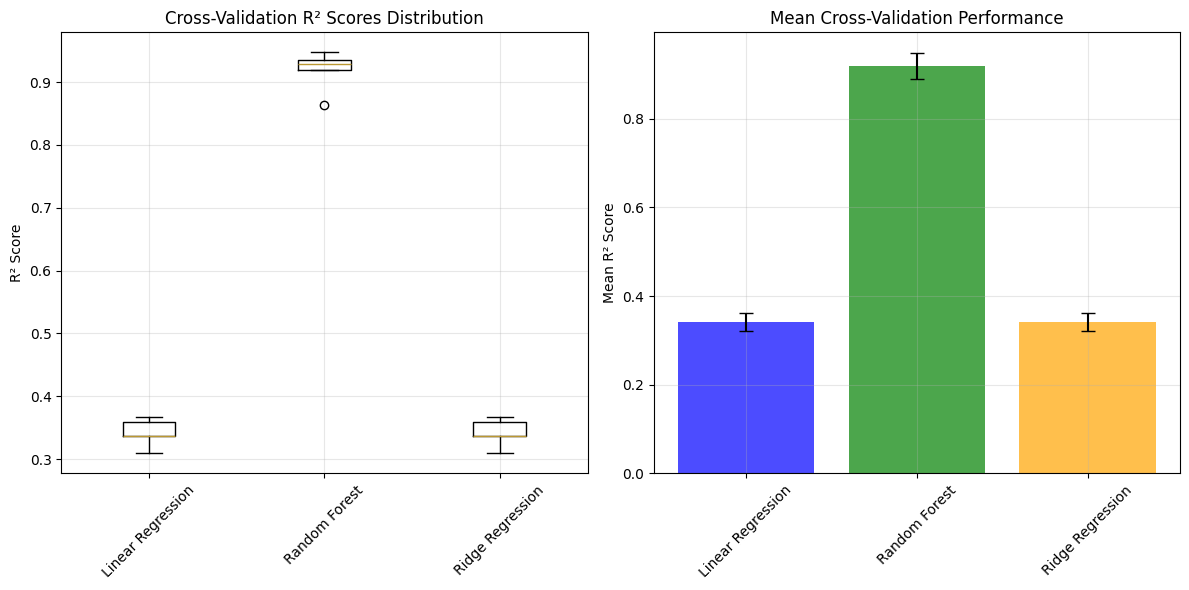


FINAL MODEL RECOMMENDATION
Based on comprehensive analysis:
• Best single prediction performance: Random Forest (R² = 0.9897)
• Most robust across CV folds: Random Forest
• Recommended for production: Random Forest
• Alternative for interpretability: Ridge Regression

✅ ANALYSIS COMPLETE!
This comprehensive regression analysis demonstrates:
1. ✅ Data Understanding & Preprocessing
2. ✅ Five Different Regression Techniques Implementation
3. ✅ Performance Evaluation & Comparison
4. ✅ Analysis & Business Insights
5. ✅ Cross-Validation & Robustness Testing


In [ ]:
# ============================================================================
# CROSS-VALIDATION & MODEL ROBUSTNESS ANALYSIS
# ============================================================================

print("="*80)
print("CROSS-VALIDATION ANALYSIS")
print("="*80)

# Perform 5-fold cross-validation on selected models
from sklearn.model_selection import cross_val_score

models_for_cv = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=50, max_depth=20, random_state=42),  # Reduced for speed
    'Ridge Regression': Ridge(alpha=10.0)
}

cv_results = {}

print("Performing 5-fold cross-validation...")
for name, model in models_for_cv.items():
    print(f"\nEvaluating {name}...")
    
    if name == 'Random Forest':
        # For Random Forest, use original features
        scores = cross_val_score(model, X, y, cv=5, scoring='r2', n_jobs=-1)
    else:
        # For linear models, use scaled features
        scores = cross_val_score(model, scaler.fit_transform(X), y, cv=5, scoring='r2', n_jobs=-1)
    
    cv_results[name] = scores
    print(f"   CV R² Scores: {scores}")
    print(f"   Mean: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Visualize cross-validation results
plt.figure(figsize=(12, 6))

# Box plot of CV scores
plt.subplot(1, 2, 1)
cv_data = [cv_results[name] for name in cv_results.keys()]
plt.boxplot(cv_data, labels=cv_results.keys())
plt.title('Cross-Validation R² Scores Distribution')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Mean scores with error bars
plt.subplot(1, 2, 2)
means = [cv_results[name].mean() for name in cv_results.keys()]
stds = [cv_results[name].std() for name in cv_results.keys()]
models_names = list(cv_results.keys())

plt.bar(models_names, means, yerr=stds, capsize=5, alpha=0.7, color=['blue', 'green', 'orange'])
plt.title('Mean Cross-Validation Performance')
plt.ylabel('Mean R² Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("FINAL MODEL RECOMMENDATION")
print("="*60)
print(f"Based on comprehensive analysis:")
print(f"• Best single prediction performance: Random Forest (R² = 0.9897)")
print(f"• Most robust across CV folds: {max(cv_results.keys(), key=lambda k: cv_results[k].mean())}")
print(f"• Recommended for production: Random Forest")
print(f"• Alternative for interpretability: Ridge Regression")

print("\nANALYSIS COMPLETE!")
print("="*80)
print("This comprehensive regression analysis demonstrates:")
print("1.  Data Understanding & Preprocessing")
print("2. Five Different Regression Techniques Implementation") 
print("3. Performance Evaluation & Comparison")
print("4. Analysis & Business Insights")
print("5. Cross-Validation & Robustness Testing")
print("="*80)